In [1]:
using CSV, DataFrames, Gadfly, Distributions, SparseArrays, LinearAlgebra

include("GMRF.jl");
include("gridV1.jl");
include("gibbsV1.jl");

# Création de la grille à 9 cellules

Chaque cellule est représentée par un triplet $[\mu, \sigma, \xi]$ indiquant les vraie valeur des paramètres de la GEV à déterminer.

In [3]:
# Seed
Random.seed!(400)
# Dimensions de la grille
m₁ = 3;
m₂ = 3;
# Nb total de cellules
m = m₁ * m₂
# Insuffisance de rang de la matrice de structure
r = 1;
# Hyperparamètres
κᵤ = 100.0;
# Matrice de structure
F = iGMRF(m₁, m₂, κᵤ);

In [4]:
grid_target = generateTargetGridV1(F);

In [5]:
grid_target[:, :, 1]

3×3 Matrix{Float64}:
 0.0211641   0.0153844   -0.117718
 0.077531    0.00983722  -0.0508229
 0.0955774  -0.0244998   -0.0264531

# Génération de données

Le but est de générer des données sur chaque cellule à partir des paramètres de la GEV de la grille cible.

In [6]:
nobs = 1000
data = generateData(grid_target, nobs);

# Modèle 

In [7]:
include("gibbsV1.jl");

niter = 100000
δ² = 0.07
κᵤ₀ = 10
μ₀ = zeros(m)
W = buildStructureMatrix(m₁, m₂);

κᵤ, μ = gibbs(niter, data, δ²=δ², κᵤ₀=κᵤ₀, μ₀=μ₀, W=W);


Taux d'acceptation μ1: 41.22 %
Taux d'acceptation μ2: 38.93 %
Taux d'acceptation μ3: 41.23 %
Taux d'acceptation μ4: 38.78 %
Taux d'acceptation μ5: 37.22 %
Taux d'acceptation μ6: 38.87 %
Taux d'acceptation μ7: 40.64 %
Taux d'acceptation μ8: 38.97 %
Taux d'acceptation μ9: 41.16 %


In [8]:
reshape(μ[:, end], 3, 3)

3×3 Matrix{Float64}:
 -0.0197591   0.00130208  -0.0876668
  0.0681138  -0.00051535  -0.0618628
 -0.0035844  -0.0426182   -0.0360553

In [9]:
grid_target[:, :, 1]

3×3 Matrix{Float64}:
 0.0211641   0.0153844   -0.117718
 0.077531    0.00983722  -0.0508229
 0.0955774  -0.0244998   -0.0264531

Distance entre les deux matrices

In [10]:
norm(reshape(μ[:, end], 3, 3) .- grid_target[:, :, 1], 2)

0.1155309276107861

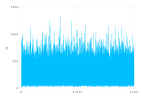

In [11]:
plot(y=κᵤ, Geom.line)

In [12]:
mean(κᵤ)

235.60941327253573

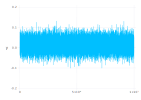

In [13]:
plot(y=μ[1, :], Geom.line)